# Assignment 1-1: K-Nearest Neighbors (k-NN)

In this notebook you will implement a K-Nearest Neighbors classifier on the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

Recall that the K-Nearest Neighbor classifier does the following:
- During training, the classifier simply memorizes the training data
- During testing, test images are compared to each training image; the predicted label is the majority vote among the K nearest training examples.

After implementing the K-Nearest Neighbor classifier, you will use *cross-validation* to find the best value of K.

The goals of this exercise are to go through a simple example of the data-driven image classification pipeline, and also to practice writing efficient, vectorized code in [PyTorch](https://pytorch.org/).

## Downloading the CIFAR-10 dataset 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import data_utils
import download
from sklearn.decomposition import PCA

In [5]:
url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
download_dir = "./data"
download.maybe_download_and_extract(url,download_dir)

Data has apparently already been downloaded and unpacked.


## Loading raw files and reading them as training and testing datasets

In [6]:
cifar10_dir = './data/cifar-10-batches-py'
X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

# Checking the size of the training and testing data
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


## Visualizing dataset samples
To give you a sense of the nature of the images in CIFAR-10, this cell visualizes some random examples from the training set.

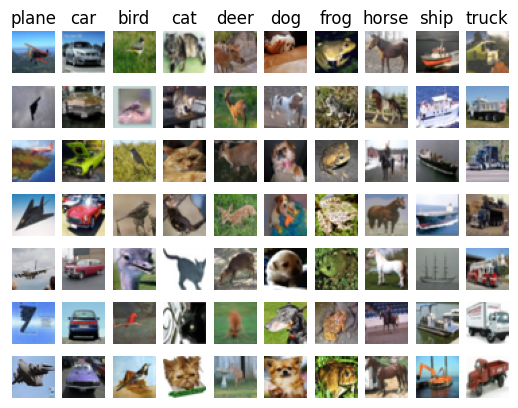

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

## Subsample the dataset
When implementing machine learning algorithms, it's usually a good idea to use a small sample of the full dataset. This way your code will run much faster, allowing for more interactive and efficient development. Once you are satisfied that you have correctly implemented the algorithm, you can then rerun with the entire dataset.

We will subsample the data to use only 500 training examples and 250 test examples:

In [7]:
# Memory error prevention by subsampling data

num_training = 500
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 250
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [8]:
# reshaping data and placing into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(500, 3072) (250, 3072)


# K-Nearest Neighbors (k-NN)

Now that we have examined and prepared our data, it is time to implement the kNN classifier. We can break the process down into two steps:

1. Perform k-Nearest neighbours algorithm on the CiFAR-10 dataset to classify test images. 
2. Perform k-fold cross validation and plot the trend line with error bars that correspond to standard deviation to find the best value of the 'k' hyper parameter and best accuracy on the dataset.
3. Select the best value for k, and rerun the classifier on our full 5000 set of training examples.
4. Discussion: Discuss your understanding.

#### Lets start by taking the X_train and y_train 

In [9]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# as we cannot  give images to knn we need to reshape them 
X_train_reshape = X_train.reshape(X_train.shape[0], -1)
X_test_reshape = X_test.reshape(X_test.shape[0], -1)



### **Perform k-Nearest neighbours algorithm on the CiFAR-10 dataset to classify test images.**

In [10]:
# Training the k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_reshape, y_train)


KNeighborsClassifier()

In [11]:
# now we will predict using the model we just trained 
Y_pred = knn.predict(X_test_reshape)

# Calculate the accuracy of the k-NN model on the test set
accuracy = np.mean(Y_pred == y_test)

print("Accuracy of k-NN model on test set is:", accuracy)

Accuracy of k-NN model on test set is: 0.188


In [12]:
# we will chak for all values of K from 1 to 21
k_values = range(1, 21)

cv_performance = []   # we will store the preformance here

# Perform k-fold cross-validation for each k
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_reshape, y_train, cv=kf, scoring='accuracy')
    cv_performance.append(scores)



## Lets visialize 
#### after running k-fold cross validation we will plot it

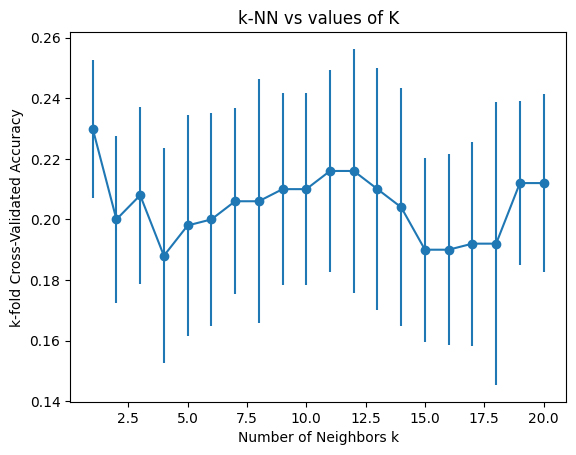

In [13]:
cv_means = [np.mean(scores) for scores in cv_performance]    # calculating mean 
cv_stds = [np.std(scores) for scores in cv_performance]      # calculation stander diviation

# Plot the results
plt.errorbar(k_values, cv_means, yerr=cv_stds, fmt='-o')
plt.title('k-NN vs values of K')
plt.xlabel('Number of Neighbors k')
plt.ylabel('k-fold Cross-Validated Accuracy')
plt.show()

In [14]:
best_k_index = np.argmax(cv_means)
best_k = k_values[best_k_index]
best_accuracy = cv_means[best_k_index]

print("The best k value in this case is:", best_k)
print("Accuracy for that K is:", best_accuracy)

The best k value in this case is: 1
Accuracy for that K is: 0.22999999999999998


### Earlier we used K = 5 but now after checking for the best value of K
### we know that the we will get the best score at K=1


In [15]:
# Training the k-NN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_reshape, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# now we will predict using the model we just trained 
Y_pred = knn.predict(X_test_reshape)

# Calculate the accuracy of the k-NN model on the test set
accuracy = np.mean(Y_pred == y_test)

print("Accuracy of k-NN model on test set is:", accuracy)

Accuracy of k-NN model on test set is: 0.22


### As expected at the best value of K we got the Accurecy = 22%

<Figure size 1000x800 with 0 Axes>

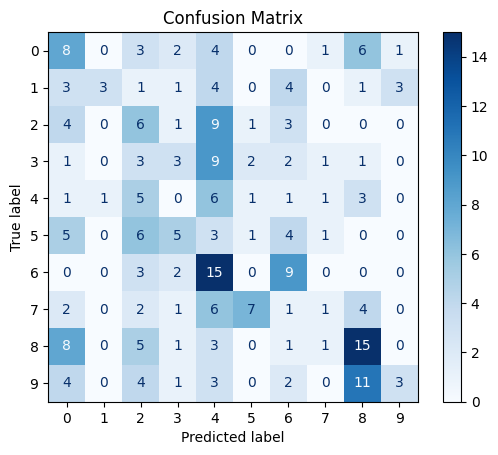

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(10, 8))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()         # plotting confusion matrix

## - I can try multiple things to improve the result like changing the distance matric.
## - I will also change the sampling of the data, while spliting the data we can try stratified sampling because we have multiple classes and some class can have very less data points as compared to others,
## - we can try to increase the subsample from 500 to a higher number , I feel that is too low number of data points for the model to learn all the 10 classes. 

In [63]:
# In order to further Improve the KNN model I am going to perform the following steps
# 1. Normalize the pixel values of the images to scale them between 0 and 1.
# 2. KNN might struggle with high-dimensional data. Reducing the dimensionality using PCA.
# 3. Try different values of K and experiment with different distance metrics. (Grid Search))
# 4. plot the data to see the clusters.

In [64]:
X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

# Checking the size of the training and testing data
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


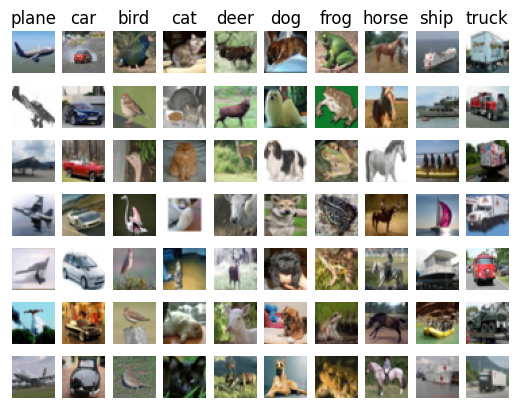

In [65]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [66]:
# Normalize the pixel values to [0, 1] range
X_train = X_train / 255.0
X_test = X_test / 255.0

In [67]:
num_training = 50000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 10000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [68]:
# reshaping data and placing into rows
X_train_flat = np.reshape(X_train, (X_train.shape[0], -1))
X_test_flat = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train_flat.shape, X_test_flat.shape)

(50000, 3072) (10000, 3072)


In [69]:
#Reducing the dimensionality using PCA.

In [70]:
# Reduce dimensions to 50 principal components
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

In [71]:
#Checking the shape of the data after dimensionality reduction

print(X_train_pca.shape, X_test_pca.shape)

(50000, 30) (10000, 30)


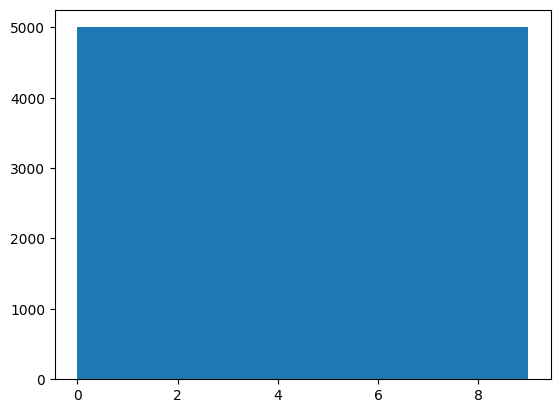

In [72]:
# checking class imbalance 
plt.hist(y_train, bins=10)
plt.show()

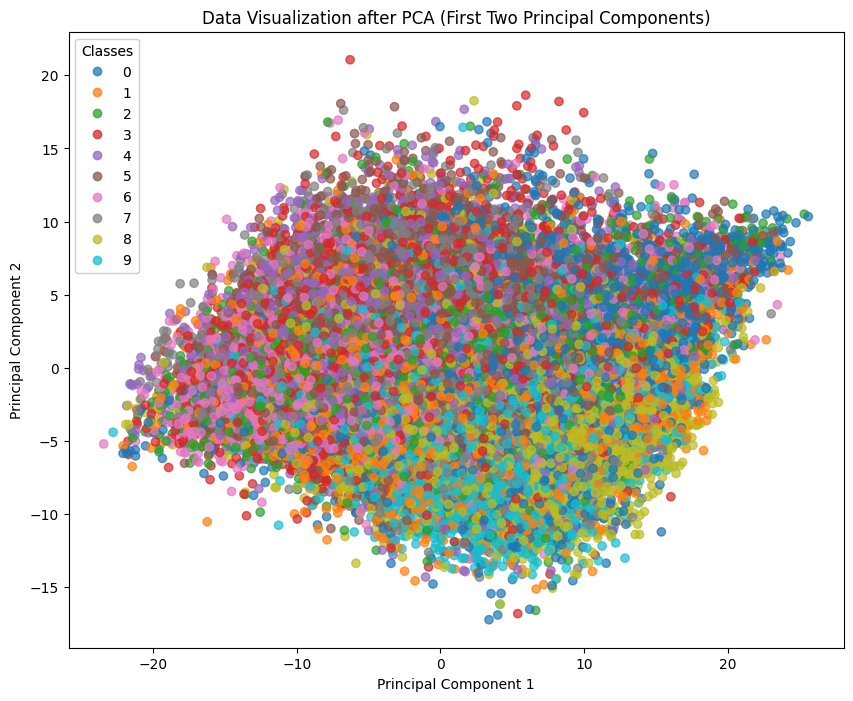

In [73]:
# 4. plot the data to see the clusters.

# Plot the first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.7)

# Add a colorbar for class labels
legend = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend)

plt.title('Data Visualization after PCA (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [74]:
#(Grid Search)

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Set up KNN with grid search for different K values and distance metrics
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)
print("Best parameters:", grid_search.best_params_)

# Use the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_pca)


Best parameters: {'metric': 'cosine', 'n_neighbors': 15}


In [75]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the k-NN model on the test set with 3000 images
# Predict on the training set
y_train_pred = best_knn.predict(X_train_pca)
# Predict on the test set
y_test_pred = best_knn.predict(X_test_pca)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
# Print both accuracies
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 51.57%
Test Accuracy: 44.26%


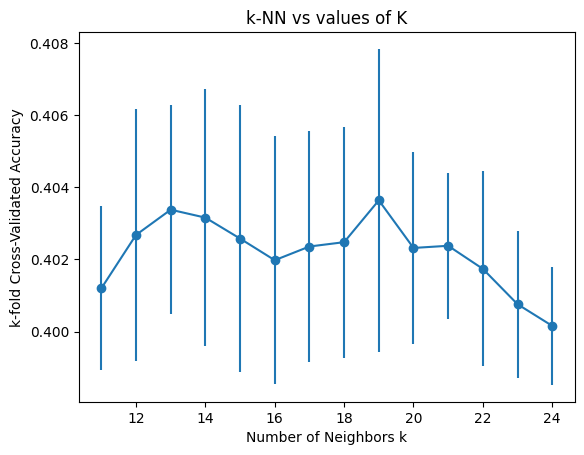

In [79]:
from sklearn.model_selection import KFold, cross_val_score  
# we will check for all values of K from 1 to 21
k_values = range(11, 25)

cv_performance = []   # we will store the preformance here

# Perform k-fold cross-validation for each k
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_pca, y_train, cv=kf, scoring='accuracy')
    cv_performance.append(scores)
    
cv_means = [np.mean(scores) for scores in cv_performance]    # calculating mean 
cv_stds = [np.std(scores) for scores in cv_performance]      # calculation stander diviation

# Plot the results
plt.errorbar(k_values, cv_means, yerr=cv_stds, fmt='-o')
plt.title('k-NN vs values of K')
plt.xlabel('Number of Neighbors k')
plt.ylabel('k-fold Cross-Validated Accuracy')
plt.show()

### We saw a huge improvement in the performance of the model after increasing the total number if images. Model accuracy improved from 22% to 44% after implementing the the 5 steps we listed above.
